In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#

In [2]:
url = "https://www.skysports.com/premier-league-table/2019"
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')

table = soup.find("table", {"class":"standing-table__table"})

headers = [] 

for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)


In [3]:
df = pd.DataFrame(columns = headers)
df

,#,Team,Pl,W,D,L,F,A,GD,Pts,Last 6


In [4]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(df)
    df.loc[length] = row_data

df

,#,Team,Pl,W,D,L,F,A,GD,Pts,Last 6
0,1,Liverpool,38,32,3,3,85,33,52,99,
1,2,Manchester City,38,26,3,9,102,35,67,81,
2,3,Manchester United,38,18,12,8,66,36,30,66,
3,4,Chelsea,38,20,6,12,69,54,15,66,
4,5,Leicester City,38,18,8,12,67,41,26,62,
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59,
6,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59,
7,8,Arsenal,38,14,14,10,56,48,8,56,
8,9,Sheffield United,38,14,12,12,39,39,0,54,
9,10,Burnley,38,15,9,14,43,50,-7,54,


In [5]:
df = df.astype({'Pl': 'float', 'W': 'float','D': 'float','L': 'float',
'F': 'float', 'A': 'float', 'GD': 'float', 'Pts': 'float'})

In [6]:
win_prob = df['W'] / df['Pl']
df.insert(len(df.columns), 'win_prob', win_prob)

In [7]:
df

,#,Team,Pl,W,D,L,F,A,GD,Pts,Last 6,win_prob
0,1,Liverpool,38.0,32.0,3.0,3.0,85.0,33.0,52.0,99.0,,0.842105
1,2,Manchester City,38.0,26.0,3.0,9.0,102.0,35.0,67.0,81.0,,0.684211
2,3,Manchester United,38.0,18.0,12.0,8.0,66.0,36.0,30.0,66.0,,0.473684
3,4,Chelsea,38.0,20.0,6.0,12.0,69.0,54.0,15.0,66.0,,0.526316
4,5,Leicester City,38.0,18.0,8.0,12.0,67.0,41.0,26.0,62.0,,0.473684
5,6,Tottenham Hotspur,38.0,16.0,11.0,11.0,61.0,47.0,14.0,59.0,,0.421053
6,7,Wolverhampton Wanderers,38.0,15.0,14.0,9.0,51.0,40.0,11.0,59.0,,0.394737
7,8,Arsenal,38.0,14.0,14.0,10.0,56.0,48.0,8.0,56.0,,0.368421
8,9,Sheffield United,38.0,14.0,12.0,12.0,39.0,39.0,0.0,54.0,,0.368421
9,10,Burnley,38.0,15.0,9.0,14.0,43.0,50.0,-7.0,54.0,,0.394737


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [9]:
X = df["GD"]
Y = df['win_prob']

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)



In [10]:
lm = LinearRegression()
lm.fit(X,Y)
lm_predict = lm.predict(X)
print(lm.intercept_)
print(lm.coef_)


[0.37894737]
[[0.00550239]]


In [6]:
import statsmodels.api as sm 
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

NameError: name 'X' is not defined

In [12]:
#Part 2: 보스턴 주택가격 데이터 분석하기: boston_csv.csv

In [2]:
missing_values = ["n/a", "na", "--"]

In [10]:
df2 = pd.read_csv("boston_csv.csv", na_values=missing_values)
df2 =df2.dropna()
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


In [7]:
from sklearn.linear_model import LinearRegression 
from  sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns


In [16]:
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.641708,11.418327,11.163765,0.069721,0.554802,6.284805,68.514542,3.797274,9.605578,409.095618,18.456574,356.353506,12.681514,22.564343,0.167331
std,8.629979,23.396912,6.873538,0.254930,0.116263,0.705085,28.247125,2.111828,8.717100,168.859125,2.165559,91.587527,7.155966,9.217580,0.373643
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082492,0.000000,5.190000,0.000000,0.449000,5.884250,44.550000,2.091150,4.000000,279.250000,17.400000,375.240000,6.950000,17.100000,0.000000
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.207450,5.000000,330.000000,19.050000,391.340000,11.395000,21.200000,0.000000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,5.213925,24.000000,666.000000,20.200000,396.120000,17.057500,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [17]:
co_relation = df2.corr()
co_relation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.201718,0.406051,-0.056841,0.421132,-0.219579,0.354022,-0.380747,0.625027,0.582237,0.290985,-0.384175,0.455111,-0.390650,-0.153676
ZN,-0.201718,1.000000,-0.535297,-0.043384,-0.517580,0.311633,-0.569038,0.664917,-0.314729,-0.316928,-0.391435,0.176832,-0.414400,0.359445,0.364826
INDUS,0.406051,-0.535297,1.000000,0.062010,0.764556,-0.391454,0.646623,-0.709355,0.594547,0.720994,0.381237,-0.356247,0.603096,-0.485291,-0.369083
CHAS,-0.056841,-0.043384,0.062010,1.000000,0.091037,0.091255,0.087172,-0.099601,-0.009157,-0.037064,-0.122132,0.049800,-0.055137,0.174682,0.107779
NOX,0.421132,-0.517580,0.764556,0.091037,1.000000,-0.301822,0.732474,-0.769195,0.612544,0.668506,0.188344,-0.380186,0.591440,-0.427771,-0.233252
RM,-0.219579,0.311633,-0.391454,0.091255,-0.301822,1.000000,-0.239939,0.204346,-0.210409,-0.292516,-0.354572,0.128335,-0.614499,0.695529,0.641968
AGE,0.354022,-0.569038,0.646623,0.087172,0.732474,-0.239939,1.000000,-0.748412,0.459126,0.509096,0.261201,-0.274829,0.604278,-0.376197,-0.190483
DIS,-0.380747,0.664917,-0.709355,-0.099601,-0.769195,0.204346,-0.748412,1.000000,-0.497000,-0.535945,-0.230986,0.292520,-0.498160,0.248532,0.118635
RAD,0.625027,-0.314729,0.594547,-0.009157,0.612544,-0.210409,0.459126,-0.497000,1.000000,0.910025,0.466991,-0.443167,0.486908,-0.386034,-0.201537
TAX,0.582237,-0.316928,0.720994,-0.037064,0.668506,-0.292516,0.509096,-0.535945,0.910025,1.000000,0.462933,-0.440811,0.542725,-0.472305,-0.276752


<AxesSubplot:>

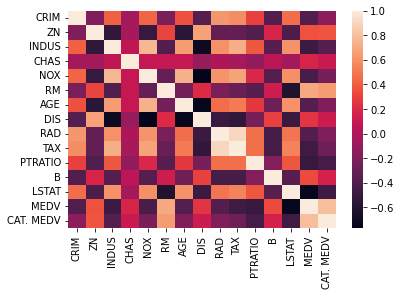

In [18]:
sns.heatmap(co_relation)

In [8]:
#Y= Ax + B
#Y = MEDV
#X = LSTAT
from sklearn.model_selection import train_test_split

In [11]:
df2 = df2.astype({'MEDV': 'float', 'LSTAT': 'float'})

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df2['LSTAT'], df2['MEDV'], test_size = 0.25, random_state = 0)

In [13]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Yhat = lr.predict(X_train)


In [15]:
print(lr.intercept_)
print(lr.coef_)

34.96140049096504
[-0.97886669]


In [17]:
print(mean_squared_error(y_train,Yhat))

40.27627752592205


In [19]:
print(lr.score(X_train,y_train))

0.5411319824508232


In [20]:
Yhat2 = lr.predict(X_test)
print(mean_squared_error(y_test, Yhat2))
print(lr.score(X_test,y_test))

32.07645208363777
0.5759871160291243


In [23]:
l_test = LinearRegression()
l_test.fit(X_test, y_test)
print(l_test.intercept_)
print(l_test.coef_)

33.87583918009533
[-0.89152394]


In [24]:
df2 = df2.astype({'LSTAT': 'float', 'TAX': 'float'})

In [25]:
A = df2[['LSTAT', 'TAX']]
B = df2['MEDV']

In [26]:
A_train,A_test,B_train,B_test = train_test_split(A,B, test_size = 0.25, random_state = 0)

In [27]:
lx = LinearRegression()
lx.fit(A_train,B_train)

LinearRegression()

In [28]:
Y_hat = lx.predict(A_train)

In [29]:
print(lx.intercept_)
print(lx.coef_)
print(mean_squared_error(B_train,Y_hat))
print(lx.score(A_train,B_train))

36.31384685772977
[-0.90536433 -0.00555407]
39.65545131415304
0.5482050614575329


In [30]:
Y_hat2 = lx.predict(A_test)

In [31]:
lx2 = LinearRegression()
lx2.fit(A_test, B_test)
print(lx2.intercept_)
print(lx2.coef_)

35.08089519386181
[-0.83586904 -0.00473963]


In [32]:
print(mean_squared_error(B_test,Y_hat2))
print(lx.score(A_test,B_test))

31.56493746549087
0.5827487362939903
